In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *

'''
30x smaller than vgg19 in memory with ~1% less performance of top 5 acc
~100x less params than vgg19
~75% inference time (per step, on Gpu(see keras.io/api/applications)) comp to vgg19
(least inference time from keras pretrained models)
'''

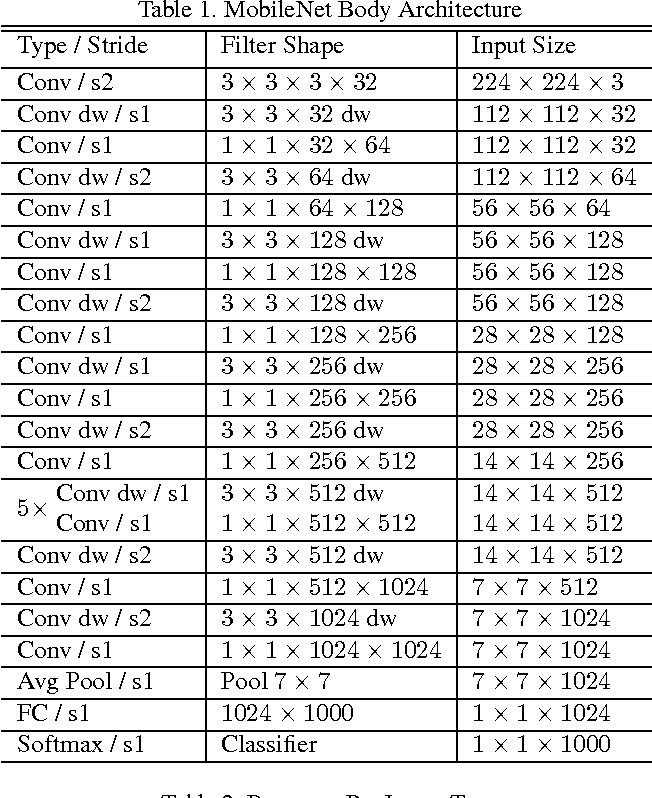

In [ ]:
def depthwise_block(input, filters, strides):
  # use depthwise sep convolutional networks
  x = DepthwiseConv2D(kernel_size=3, strides=strides, padding='same')(input)
  x = BatchNormalization()(x)
  x = tf.nn.relu(x)
  x = Conv2D(kernel_size=1, strides=1, filters=filters, padding='same')(x) #---> point wise convolution
  x = BatchNormalization()(x)
  x = ReLU()(x)

  return x

In [ ]:
from tensorflow.keras import Model

input = Input(shape=(224,224,3))


x = Conv2D(kernel_size=3, filters=32, strides=2, padding='same')(input)
x = BatchNormalization()(x)
x = ReLU()(x)

x = depthwise_block(x, filters=64, strides=1)
x = depthwise_block(x, filters=128, strides=2)
x = depthwise_block(x, filters=128, strides=1)
x = depthwise_block(x,filters=256, strides=2)
x = depthwise_block(x, filters=256, strides=1)
x = depthwise_block(x, filters=512, strides=2)

for zero in range(1,6):
  x = depthwise_block(x, filters=512, strides=1)


x = depthwise_block(x, filters=1024, strides=2)
x = depthwise_block(x, filters=1024, strides=1)

x = AvgPool2D(pool_size=7, strides=1)(x)
x = Dense(1000, activation='softmax')(x)

mobilenet = Model(inputs=input, outputs=x)

In [ ]:
mobilenet.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_232 (Conv2D)         (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 112, 112, 32)      128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d (Depthwis  (None, 112, 112, 32)      320       
 eConv2D)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 32)      128 